<a href="https://colab.research.google.com/github/Aggarwal0741993/credit_card_fraud_detection/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.8 MB/s eta 0:00:00


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report,roc_auc_score,recall_score,precision_score
from imblearn.under_sampling import RandomUnderSampler
import optuna

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [5]:
import os
os.listdir(path)

['creditcard.csv']

In [6]:
df = pd.read_csv(path + "/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


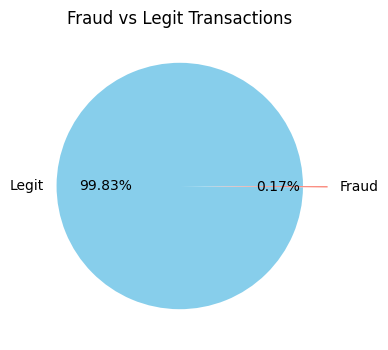

In [8]:
#Pie chart to show class distribution
labels = ['Legit', 'Fraud']
sizes = df['Class'].value_counts()
colors = ['skyblue', 'salmon']
explode = (0, 0.2)

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, explode=explode)
plt.title('Fraud vs Legit Transactions')
plt.show()

In [9]:
x = df.drop("Class", axis=1)
y = df["Class"]

In [10]:
#run=RandomUnderSampler(random_state=42)
x_res,y_res=x,y

In [11]:
y_res.value_counts()

,count
Class,
0,284315
1,492


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

In [55]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [14]:
scaler=StandardScaler()
x_train[["Time","Amount"]]=scaler.fit_transform(x_train[["Amount","Time"]])
x_val[["Time","Amount"]]=scaler.transform(x_val[["Amount","Time"]])
x_test[["Time","Amount"]]=scaler.transform(x_test[["Amount","Time"]])

In [48]:
import pandas as pd
import optuna
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import optuna.logging
optuna.logging.set_verbosity(optuna.logging.INFO)

# === Step 2: Load and Preprocess Data ===
df = pd.read_csv(path + "/creditcard.csv")

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train+val and final test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scale Time and Amount AFTER splitting
scaler = StandardScaler()
X_trainval[['Time', 'Amount']] = scaler.fit_transform(X_trainval[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# === Step 3: Optuna Objective Function ===
def objective(trial):
    model_name = trial.suggest_categorical('model', ['logistic', 'random_forest', 'xgboost'])

    if model_name == 'logistic':
        C = trial.suggest_loguniform('logreg_C', 1e-4, 100)
        penalty = trial.suggest_categorical('logreg_penalty', ['l1', 'l2'])
        model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', class_weight='balanced')

    elif model_name == 'random_forest':
        n_estimators = trial.suggest_int('rf_n_estimators', 50, 150)
        max_depth = trial.suggest_int('rf_max_depth', 3, 15)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                       class_weight='balanced', random_state=42)

    elif model_name == 'xgboost':
        n_estimators = trial.suggest_int('xgb_n_estimators', 50, 150)
        learning_rate = trial.suggest_loguniform('xgb_learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('xgb_max_depth', 3, 10)
        scale_pos_weight = trial.suggest_int('xgb_scale_pos_weight', 1, 100)
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                              max_depth=max_depth, scale_pos_weight=scale_pos_weight,
                              use_label_encoder=False, eval_metric='logloss')

    # Cross-validation (5-fold) on train+val set
    score = cross_val_score(model, X_trainval, y_trainval, scoring='f1', cv=5)
    return score.mean()

# === Step 4: Run Optuna Study ===
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # You can increase this for better results

# Show best config
print("\nBest Recall Score from CV:", study.best_value)
print("Best Model and Parameters:", study.best_params)

[I 2025-05-24 16:36:07,144] A new study created in memory with name: no-name-f1273afb-1dd6-4869-81ac-7d0311cc0fb0
[I 2025-05-24 16:47:33,734] Trial 0 finished with value: 0.8277217679880231 and parameters: {'model': 'random_forest', 'rf_n_estimators': 107, 'rf_max_depth': 11}. Best is trial 0 with value: 0.8277217679880231.
[I 2025-05-24 16:47:55,088] Trial 1 finished with value: 0.8564026586715905 and parameters: {'model': 'xgboost', 'xgb_n_estimators': 76, 'xgb_learning_rate': 0.16397293229183738, 'xgb_max_depth': 8, 'xgb_scale_pos_weight': 17}. Best is trial 1 with value: 0.8564026586715905.
[I 2025-05-24 16:48:09,746] Trial 2 finished with value: 0.6730671681323979 and parameters: {'model': 'xgboost', 'xgb_n_estimators': 108, 'xgb_learning_rate': 0.014496348220620561, 'xgb_max_depth': 3, 'xgb_scale_pos_weight': 88}. Best is trial 1 with value: 0.8564026586715905.
[I 2025-05-24 16:48:32,934] Trial 3 finished with value: 0.8553028747103738 and parameters: {'model': 'xgboost', 'xgb_n_


Best Recall Score from CV: 0.8564026586715905
Best Model and Parameters: {'model': 'xgboost', 'xgb_n_estimators': 76, 'xgb_learning_rate': 0.16397293229183738, 'xgb_max_depth': 8, 'xgb_scale_pos_weight': 17}


In [56]:
model = XGBClassifier(
    n_estimators=76,
    learning_rate=0.16307,
    max_depth=8,
    scale_pos_weight=17,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [57]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.16307, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=76,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [71]:
y_train_pred=model.predict(x_train)
recall_score(y_train,y_train_pred)

1.0

In [62]:
y_val_pred=model.predict(x_val)
f1_score(y_val,y_val_pred)

0.8208955223880597

In [63]:
y_pred_test=model.predict(x_test)
f1_score(y_test,y_pred_test)

0.8923076923076924

In [61]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# AUC Score
y_prob = model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_test)
print("\nROC AUC Score:", auc_score)

Confusion Matrix:
 [[85299     8]
 [   20   116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.85      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.93      0.95     85443
weighted avg       1.00      1.00      1.00     85443


ROC AUC Score: 0.9264236987654969
